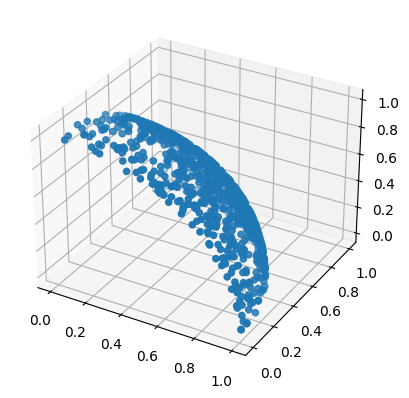

In [16]:
import numpy as np

# 3 dim circle circumference

X = np.random.rand(1000, 3)
X = X / np.linalg.norm(X, axis=1)[:, None]


# Plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()


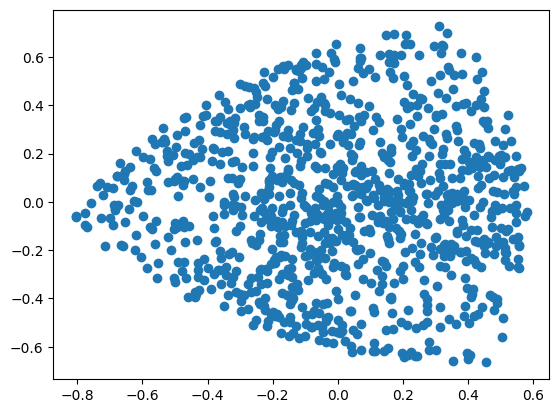

In [17]:
# Project to 2D

X_centered = X - X.mean(axis=0)
U, S, V = np.linalg.svd(X_centered)
d = 2
c1 = V.T[:, 0]
c2 = V.T[:, 1]

# Show the 2D projection

W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.show()



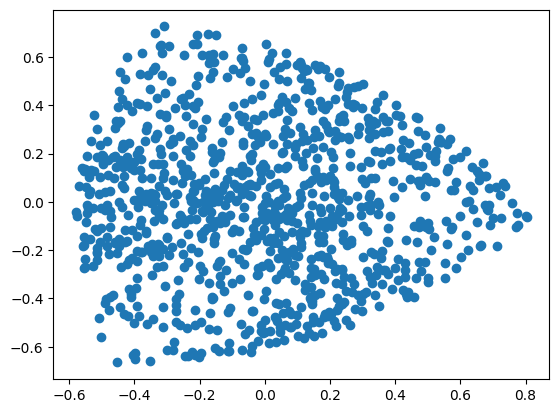

In [18]:
# Using scikit-learn

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_pca = pca.fit_transform(X)

plt.scatter(X2D_pca[:, 0], X2D_pca[:, 1])
plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.50505988, 0.46294052])

In [26]:
pca = PCA()
pca.fit(X)

print(pca.components_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print(cumsum)
print(d)

[[ 0.79928446 -0.47892172 -0.36301286]
 [-0.0676214  -0.671901    0.73754755]
 [-0.59713625 -0.56496286 -0.56942538]]
[0.50505988 0.9680004  1.        ]
2


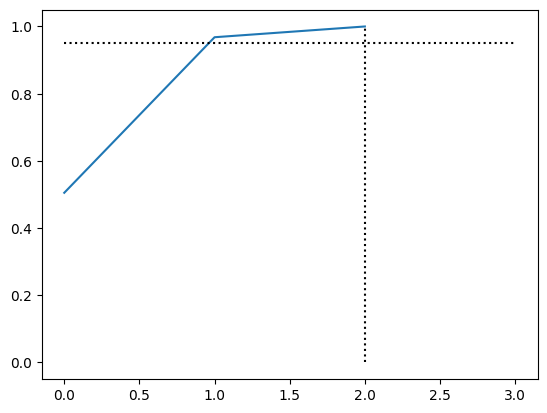

In [34]:
# Plot the cumsum of the explained variance ratio, and where it reaches 95%

plt.plot(cumsum)
plt.plot([d, d], [0, 1], 'k:')
plt.plot([0, 3], [0.95, 0.95], 'k:')
plt.show()


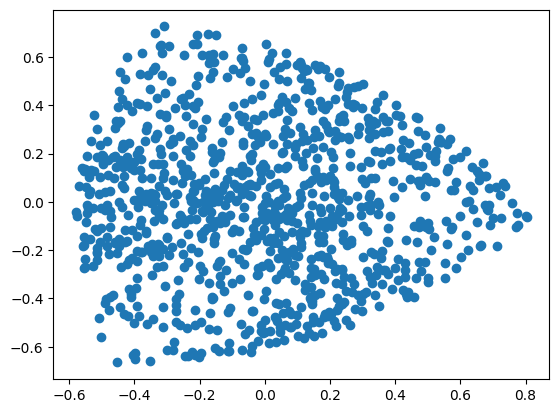

In [32]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# Plot the reduced data

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring='accuracy')

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]


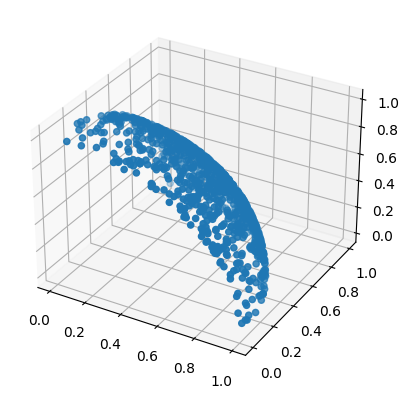

In [43]:
# Generate X and y for the grid search

X = np.random.rand(1000, 3)
X = X / np.linalg.norm(X, axis=1)[:, None]
y = np.random.randint(0, 2, 1000)

# Plot the data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [44]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)

grid_search.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [46]:
# Plot the best model

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'sigmoid'}
0.5229960499421576
Pipeline(steps=[('kpca',
                 KernelPCA(gamma=0.043333333333333335, kernel='sigmoid',
                           n_components=2)),
                ('log_reg', LogisticRegression())])
